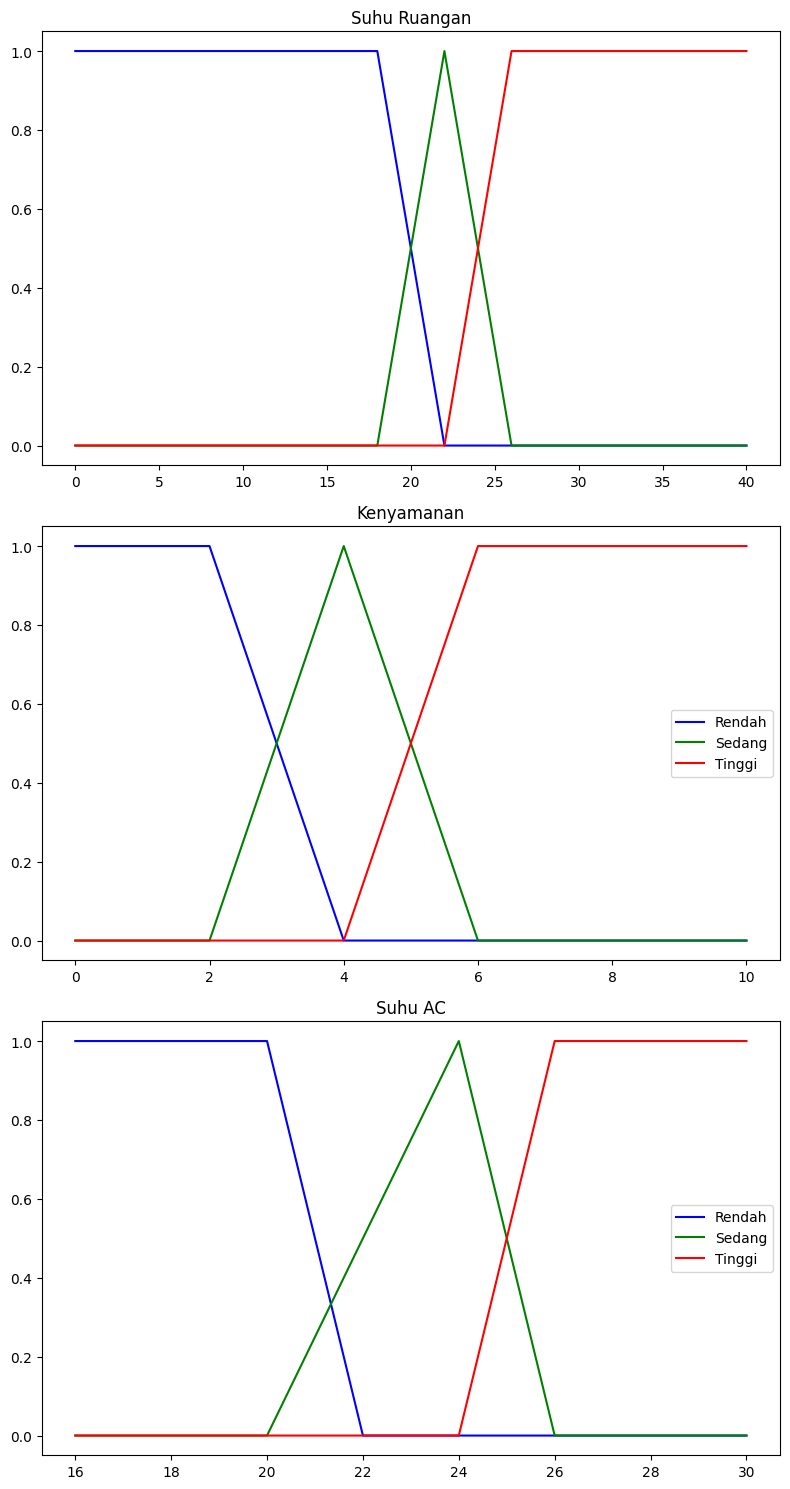

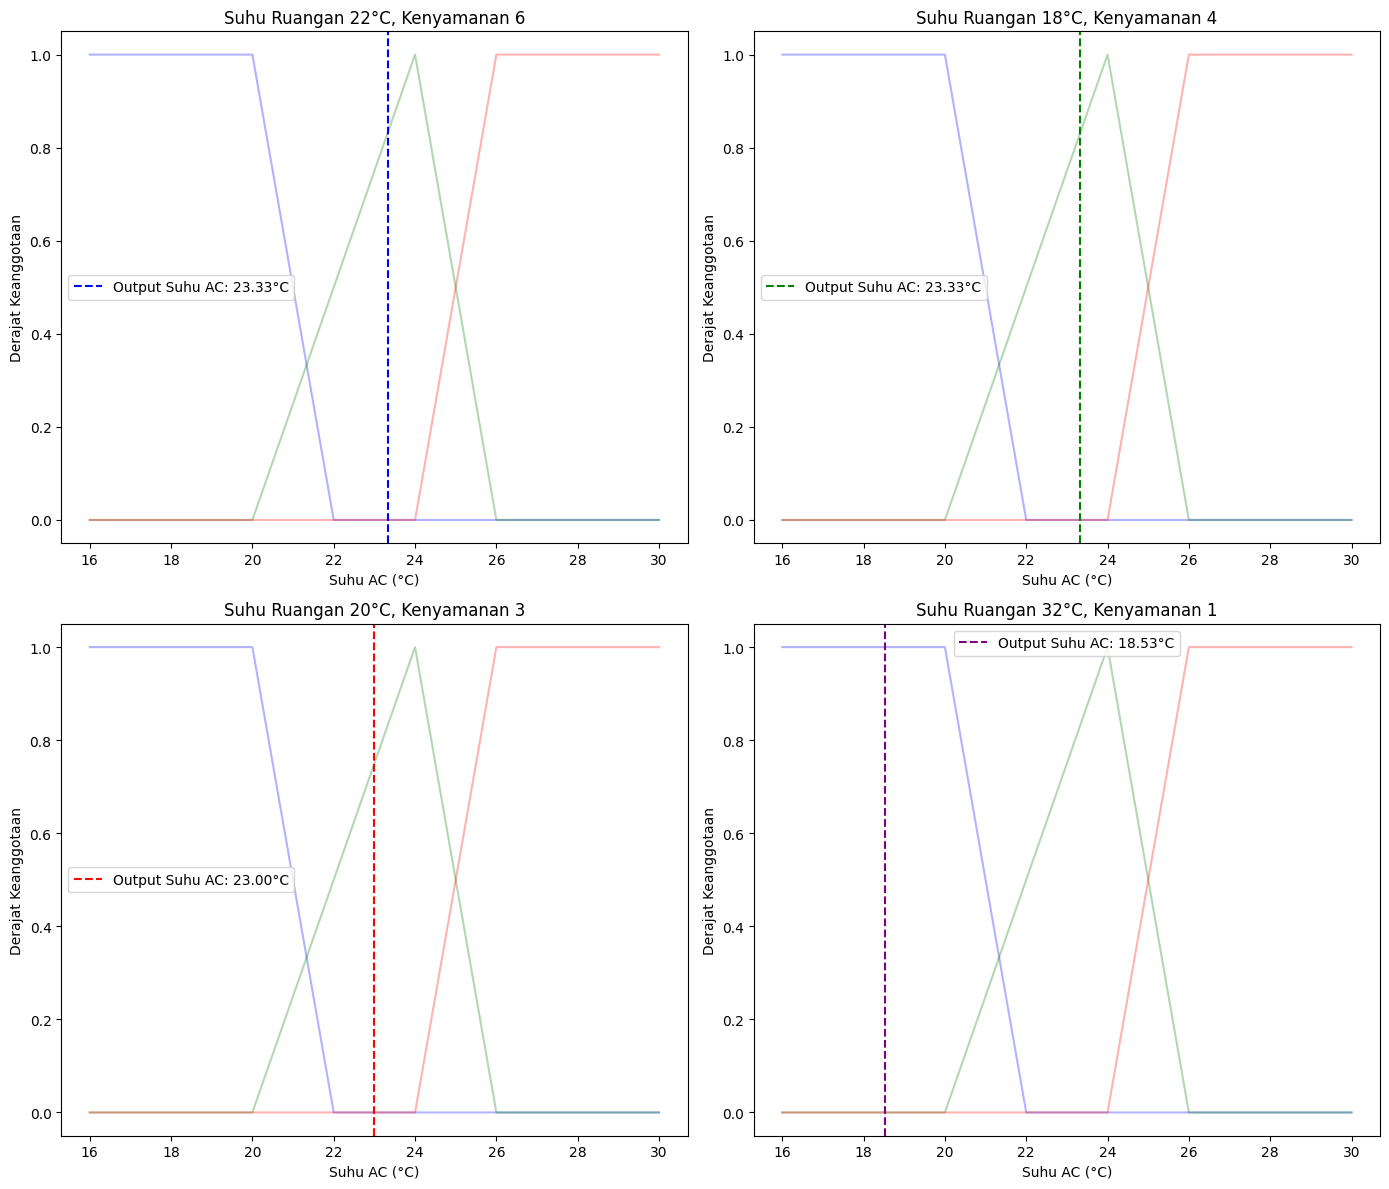

In [52]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Definisi variabel input dan output
suhu_ruangan = ctrl.Antecedent(np.arange(0, 41, 1), 'suhu_ruangan')
kenyamanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kenyamanan')
suhu_ac = ctrl.Consequent(np.arange(16, 31, 1), 'suhu_ac')

# Definisi himpunan fuzzy untuk variabel input (suhu ruangan)
suhu_ruangan['dingin'] = fuzz.trapmf(suhu_ruangan.universe, [0, 0, 18, 22])
suhu_ruangan['hangat'] = fuzz.trimf(suhu_ruangan.universe, [18, 22, 26])
suhu_ruangan['panas'] = fuzz.trapmf(suhu_ruangan.universe, [22, 26, 40, 40])

# Definisi himpunan fuzzy untuk variabel input (kenyamanan)
kenyamanan['rendah'] = fuzz.trapmf(kenyamanan.universe, [0, 0, 2, 4])
kenyamanan['sedang'] = fuzz.trimf(kenyamanan.universe, [2, 4, 6])
kenyamanan['tinggi'] = fuzz.trapmf(kenyamanan.universe, [4, 6, 10, 10])

# Definisi himpunan fuzzy untuk variabel output (suhu AC)
suhu_ac['rendah'] = fuzz.trapmf(suhu_ac.universe, [16, 16, 20, 22])
suhu_ac['sedang'] = fuzz.trimf(suhu_ac.universe, [20, 24, 26])
suhu_ac['tinggi'] = fuzz.trapmf(suhu_ac.universe, [24, 26, 30, 30])

# Definisi aturan fuzzy
rule1 = ctrl.Rule(suhu_ruangan['dingin'] & kenyamanan['rendah'], suhu_ac['tinggi'])
rule2 = ctrl.Rule(suhu_ruangan['dingin'] & kenyamanan['sedang'], suhu_ac['sedang'])
rule3 = ctrl.Rule(suhu_ruangan['dingin'] & kenyamanan['tinggi'], suhu_ac['rendah'])

rule4 = ctrl.Rule(suhu_ruangan['hangat'] & kenyamanan['rendah'], suhu_ac['rendah'])
rule5 = ctrl.Rule(suhu_ruangan['hangat'] & kenyamanan['sedang'], suhu_ac['sedang'])
rule6 = ctrl.Rule(suhu_ruangan['hangat'] & kenyamanan['tinggi'], suhu_ac['sedang'])

rule7 = ctrl.Rule(suhu_ruangan['panas'] & kenyamanan['rendah'], suhu_ac['rendah'])
rule8 = ctrl.Rule(suhu_ruangan['panas'] & kenyamanan['sedang'], suhu_ac['sedang'])
rule9 = ctrl.Rule(suhu_ruangan['panas'] & kenyamanan['tinggi'], suhu_ac['tinggi'])

# Membuat sistem kontrol
suhu_ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
suhu_ac_simulasi = ctrl.ControlSystemSimulation(suhu_ac_ctrl)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 15))

# Plot himpunan fuzzy suhu ruangan
ax1.plot(suhu_ruangan.universe, suhu_ruangan['dingin'].mf, 'b', linewidth=1.5, label='Dingin')
ax1.plot(suhu_ruangan.universe, suhu_ruangan['hangat'].mf, 'g', linewidth=1.5, label='Hangat')
ax1.plot(suhu_ruangan.universe, suhu_ruangan['panas'].mf, 'r', linewidth=1.5, label='Panas')
ax1.set_title('Suhu Ruangan')
ax1.legend()

# Plot himpunan fuzzy kenyamanan
ax2.plot(kenyamanan.universe, kenyamanan['rendah'].mf, 'b', linewidth=1.5, label='Rendah')
ax2.plot(kenyamanan.universe, kenyamanan['sedang'].mf, 'g', linewidth=1.5, label='Sedang')
ax2.plot(kenyamanan.universe, kenyamanan['tinggi'].mf, 'r', linewidth=1.5, label='Tinggi')
ax2.set_title('Kenyamanan')
ax2.legend()

# Plot himpunan fuzzy suhu AC
ax3.plot(suhu_ac.universe, suhu_ac['rendah'].mf, 'b', linewidth=1.5, label='Rendah')
ax3.plot(suhu_ac.universe, suhu_ac['sedang'].mf, 'g', linewidth=1.5, label='Sedang')
ax3.plot(suhu_ac.universe, suhu_ac['tinggi'].mf, 'r', linewidth=1.5, label='Tinggi')
ax3.set_title('Suhu AC')
ax3.legend()

plt.tight_layout()
plt.show()

def test_system(suhu_ruangan_val, kenyamanan_val):
    suhu_ac_simulasi.input['suhu_ruangan'] = suhu_ruangan_val
    suhu_ac_simulasi.input['kenyamanan'] = kenyamanan_val
    suhu_ac_simulasi.compute()
    output_suhu_ac = suhu_ac_simulasi.output['suhu_ac']
    return output_suhu_ac

test_case = [
    (22, 6),
    (18, 4),
    (20, 3),
    (32, 1)
]

# Memvisualisasikan hasil test case
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()
colors = ['blue', 'green', 'red', 'purple']

for idx, (suhu_ruangan_val, kenyamanan_val) in enumerate(test_case):
    output_suhu_ac = test_system(suhu_ruangan_val, kenyamanan_val)
    axs[idx].plot(suhu_ac.universe, suhu_ac['rendah'].mf, 'b', linewidth=1.5, alpha=0.3)
    axs[idx].plot(suhu_ac.universe, suhu_ac['sedang'].mf, 'g', linewidth=1.5, alpha=0.3)
    axs[idx].plot(suhu_ac.universe, suhu_ac['tinggi'].mf, 'r', linewidth=1.5, alpha=0.3)
    axs[idx].axvline(output_suhu_ac, color=colors[idx], linestyle='--', label=f'Output Suhu AC: {output_suhu_ac:.2f}°C')
    axs[idx].set_title(f'Suhu Ruangan {suhu_ruangan_val}°C, Kenyamanan {kenyamanan_val}')
    axs[idx].legend()
    axs[idx].set_xlabel('Suhu AC (°C)')
    axs[idx].set_ylabel('Derajat Keanggotaan')

plt.tight_layout()
plt.show()